## **1. Fit a linear regression model as usual**





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('study_data_large.csv')





Saving study_data_large.csv to study_data_large.csv


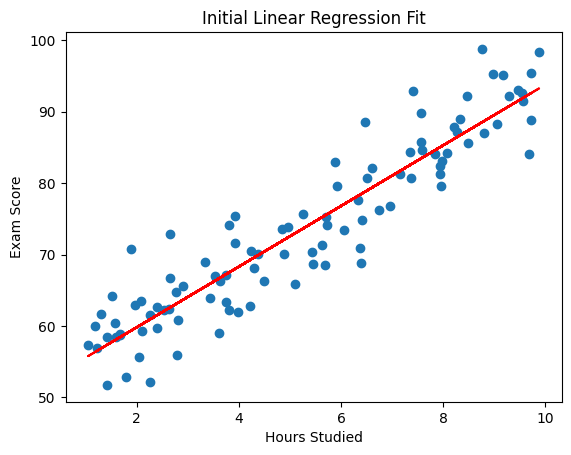

Initial correlation coefficient (r): 0.929
Initial slope: 4.244


In [ ]:
x =  df['study_hours']
y = df['exam_scores']
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.title('Initial Linear Regression Fit')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

print(f"Initial correlation coefficient (r): {r:.3f}")
print(f"Initial slope: {slope:.3f}")

### **2. Identify and plot any potential outliers (data points that significantly deviate from theregression line).**

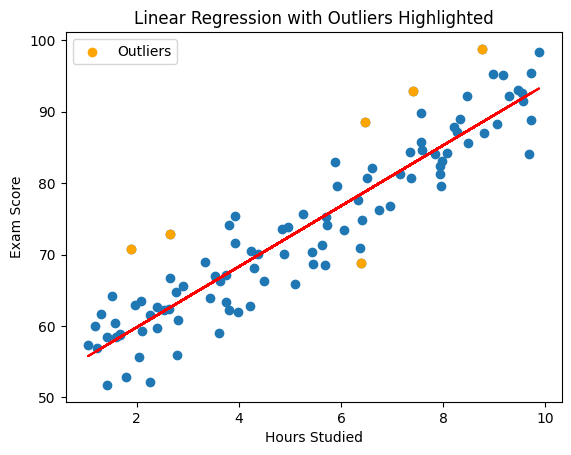

Number of outliers identified: 6


In [ ]:
residuals = y - mymodel
residual_std = np.std(residuals)

outliers = (np.abs(residuals) > 2 * residual_std)
outlier_points = df[outliers]


plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.scatter(outlier_points['study_hours'], outlier_points['exam_scores'], color='orange', label='Outliers')
plt.title('Linear Regression with Outliers Highlighted')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

print(f"Number of outliers identified: {outliers.sum()}")

### **3. Remove the outliers and refit the regression model.**

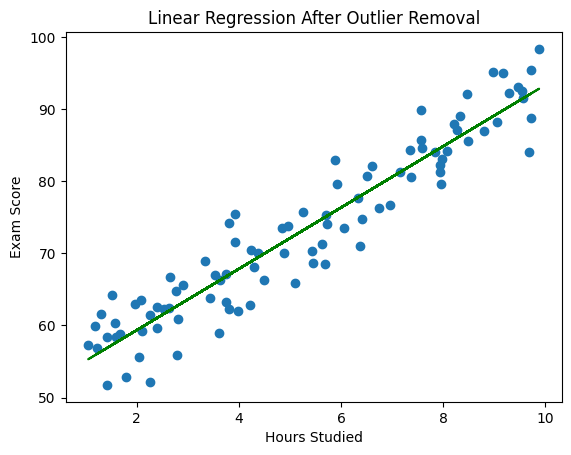

New correlation coefficient (r): 0.948
New slope: 4.252


In [ ]:
clean_data = df[~outliers]
x_clean = clean_data['study_hours']
y_clean = clean_data['exam_scores']

slope_clean, intercept_clean, r_clean, p_clean, std_err_clean = stats.linregress(x_clean, y_clean)

def myfunc_clean(x):
    return slope_clean * x + intercept_clean
mymodel_clean = list(map(myfunc_clean, x_clean))

plt.scatter(x_clean, y_clean)
plt.plot(x_clean, mymodel_clean, color='green')
plt.title('Linear Regression After Outlier Removal')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

print(f"New correlation coefficient (r): {r_clean:.3f}")
print(f"New slope: {slope_clean:.3f}")

### **4. Compare the correlation coefficient (r) and slope before and after removing outliers.**

In [ ]:
print("Comparison:")
print(f"Correlation coefficient (r): {r:.3f} (before) vs {r_clean:.3f} (after)")
print(f"Slope: {slope:.3f} (before) vs {slope_clean:.3f} (after)")

Comparison:
Correlation coefficient (r): 0.929 (before) vs 0.948 (after)
Slope: 4.244 (before) vs 4.252 (after)


### **5. Predict the score of a student who studied for 6.25 hours and for 9.25 hours**

In [ ]:
hours = [6.25, 9.25]
predictions = [myfunc_clean(h) for h in hours]

print("\nPredictions after outlier removal:")
for h, p in zip(hours, predictions):
    print(f"A student studying {h} hours would score approximately {p:.1f}")


Predictions after outlier removal:
A student studying 6.25 hours would score approximately 77.4
A student studying 9.25 hours would score approximately 90.2


## **B. Using the XY_dataset.csv file, answer the following questions**

## 1. Plot the data and fit a linear regression model.

In [ ]:
from google.colab import files
uploaded = files.upload()
xy_data= pd.read_csv('XY_dataset.csv')

Saving XY_dataset.csv to XY_dataset (3).csv


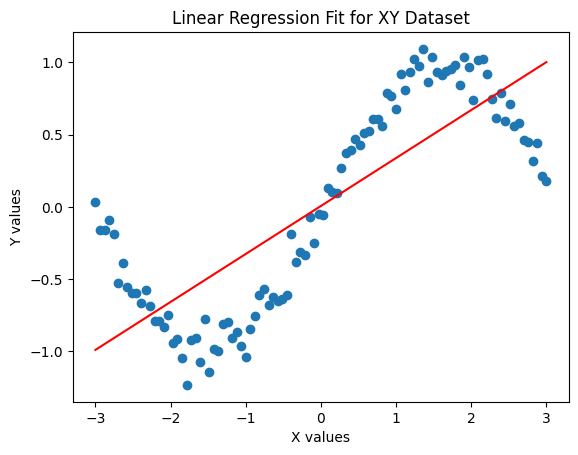

Correlation coefficient (r): 0.808


In [ ]:

x_b = xy_data['X']
y_b = xy_data['Y']
slope_b, intercept_b, r_b, p_b, std_err_b = stats.linregress(x_b, y_b)

def myfunc_b(x):
    return slope_b * x + intercept_b
mymodel_b = list(map(myfunc_b, x_b))

plt.scatter(x_b, y_b)
plt.plot(x_b, mymodel_b, color='red')
plt.title('Linear Regression Fit for XY Dataset')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

print(f"Correlation coefficient (r): {r_b:.3f}")

### **2. Visually and statistically demonstrate that the linear model is a poor fit for the data.**

**Visual Demonstration**

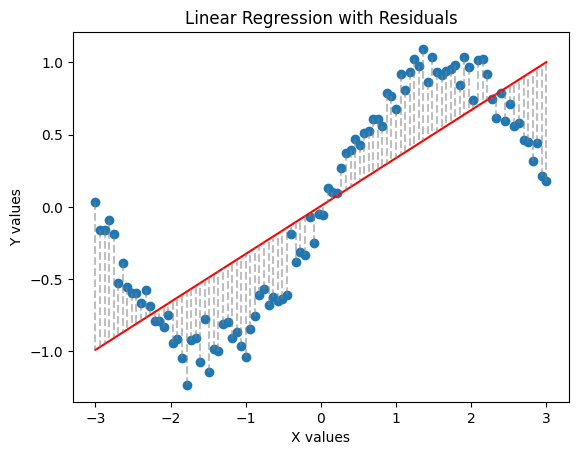

In [ ]:
plt.scatter(x_b, y_b)
plt.plot(x_b, mymodel_b, color='red')
for xi, yi, ypred in zip(x_b, y_b, mymodel_b):
    plt.plot([xi, xi], [yi, ypred], color='gray', linestyle='--', alpha=0.5)
plt.title('Linear Regression with Residuals')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

**Statical Demonstration**

Mean Squared Error: 0.18


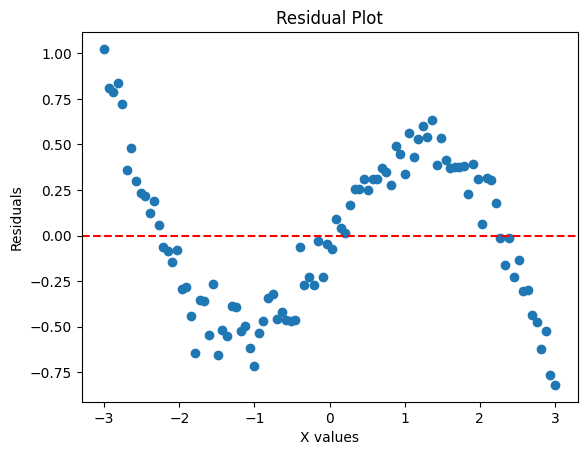


The residual plot shows a clear pattern (not random scatter around zero),
and the MSE is relatively high, both indicating the linear model is a poor fit.
The data likely follows a non-linear relationship that a linear model cannot capture well.


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_b, mymodel_b)
print(f"Mean Squared Error: {mse:.2f}")

residuals = y_b - mymodel_b
plt.scatter(x_b, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('X values')
plt.ylabel('Residuals')
plt.show()

print("\nThe residual plot shows a clear pattern (not random scatter around zero),")
print("and the MSE is relatively high, both indicating the linear model is a poor fit.")
print("The data likely follows a non-linear relationship that a linear model cannot capture well.")